In [13]:
#Rahul Ganesan
#Task 2 (Kmeans clustering)

#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn 
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

#inputing the dataset
dataset=pd.read_csv('Iris.csv')
X=dataset.iloc[:,[1,2,3,4]].values
df=pd.DataFrame(data=dataset)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
#Encode Iris species
encode = LabelEncoder()
X_Labels = encode.fit_transform(df["Species"])


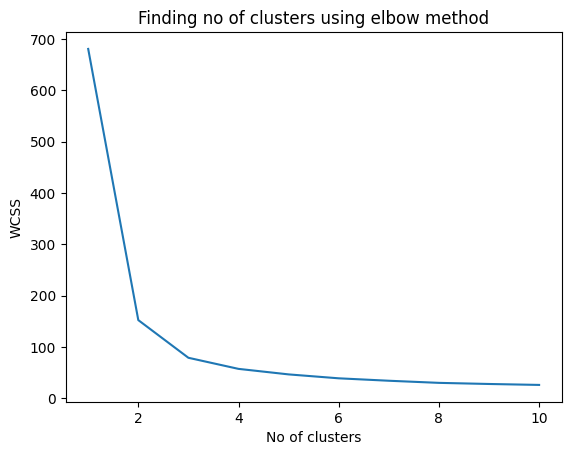

In [15]:
#Using elbow method to find optimal no of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
#Plotting the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Finding no of clusters using elbow method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

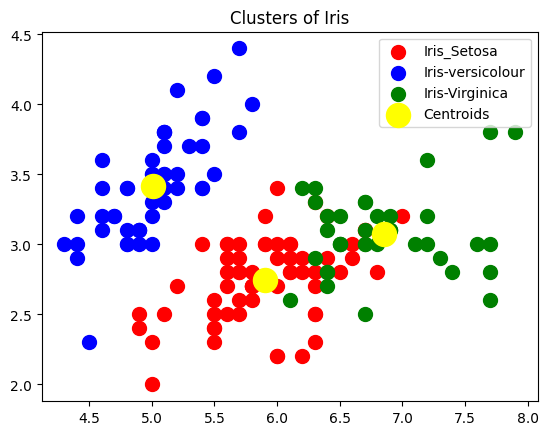

In [16]:
#Hence the no of clusters can be taken as 3
#Training the model
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)

#plotting the result graph
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris_Setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-Virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Iris')
plt.legend()
plt.show()

 

In [17]:
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score, rand_score

print("The Rand Score is",rand_score(y_kmeans, X_Labels))
print("The Adjusted Rand Score is",adjusted_rand_score(y_kmeans, X_Labels))
print("Homogenity Score is",metrics.homogeneity_score(X_Labels, y_kmeans))

The Rand Score is 0.8797315436241611
The Adjusted Rand Score is 0.7302382722834697
Homogenity Score is 0.7514854021988339
